****
## Import Libraries ##
****

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix


****
## Read Dataset ##
****

In [3]:
df=pd.read_csv("cancer patient data sets.csv")


In [4]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

****
## Data Visualization ##
****

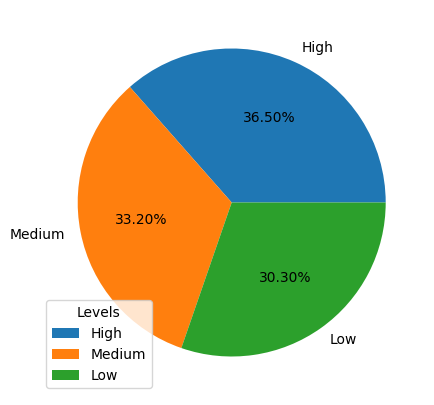

In [6]:
# Count the distribution of the target variable
tdf = df['Level'].value_counts().reset_index()
tdf.columns = ['Level', 'Count']  # Rename columns for clarity

# Plotting the pie chart
plt.figure(figsize=(15, 5))
plt.pie(x=tdf['Count'], labels=tdf['Level'], autopct='%.2f%%')
plt.legend(tdf['Level'], title="Levels")
plt.show()


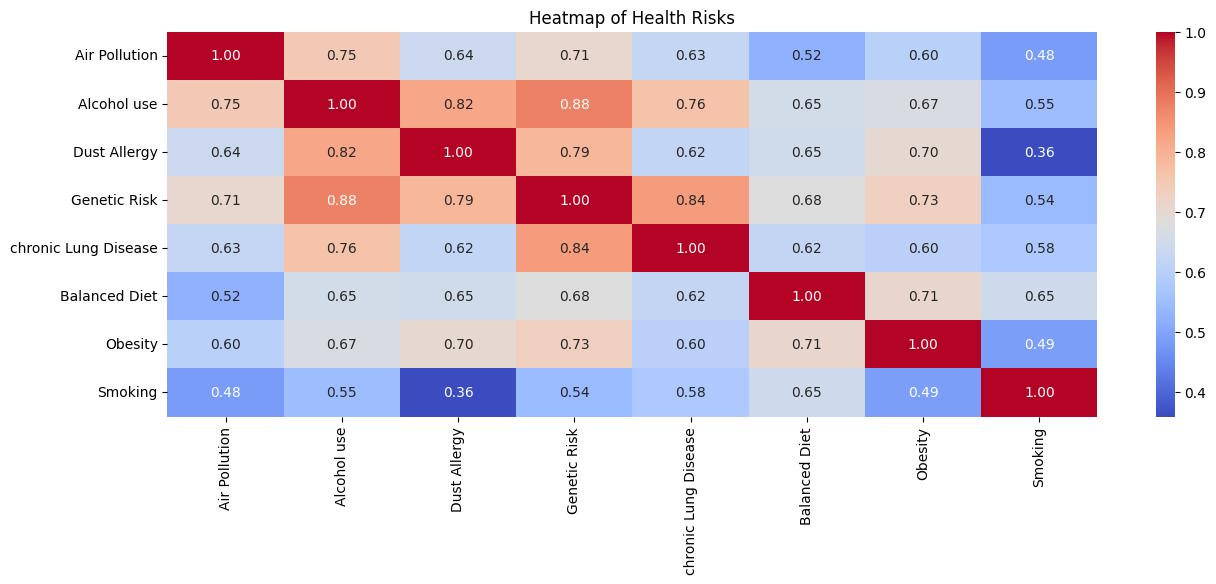

In [7]:
#Let us look how some of the Risk, Allergies and behavious are related to each other
corr=df[['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Genetic Risk', 
            'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking']].corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Health Risks')
plt.show()

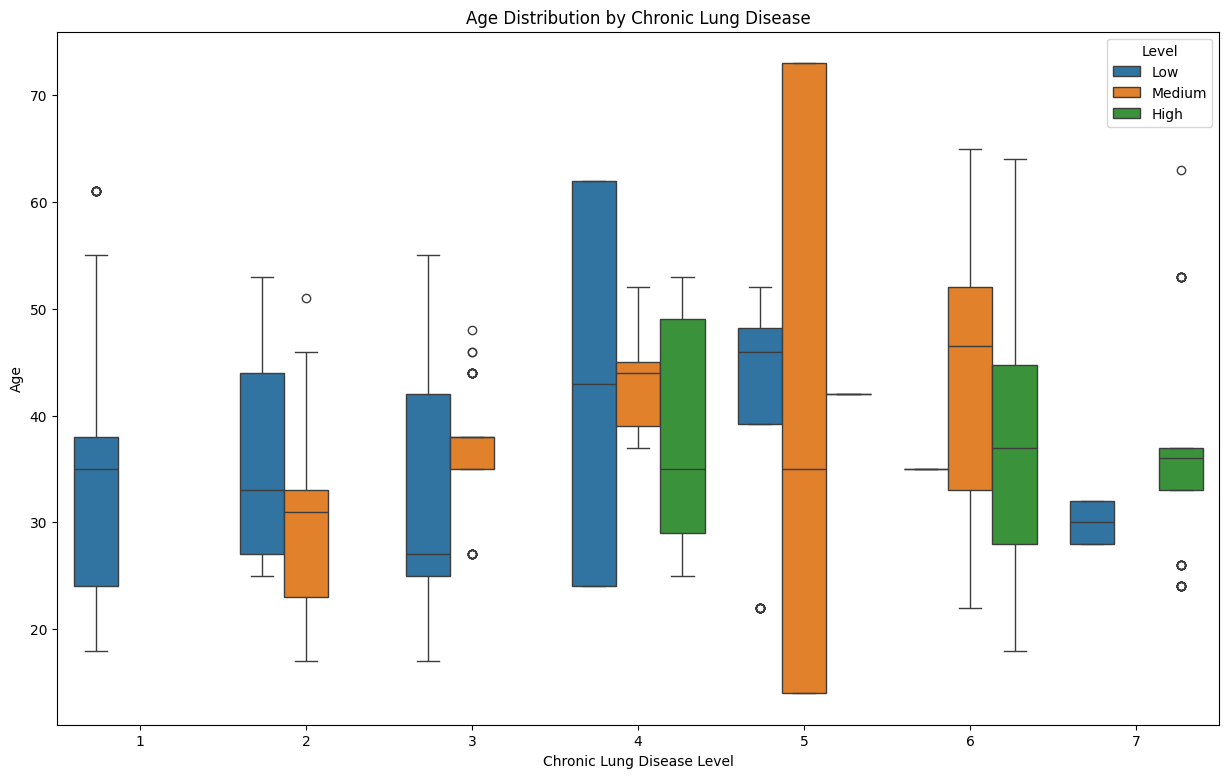

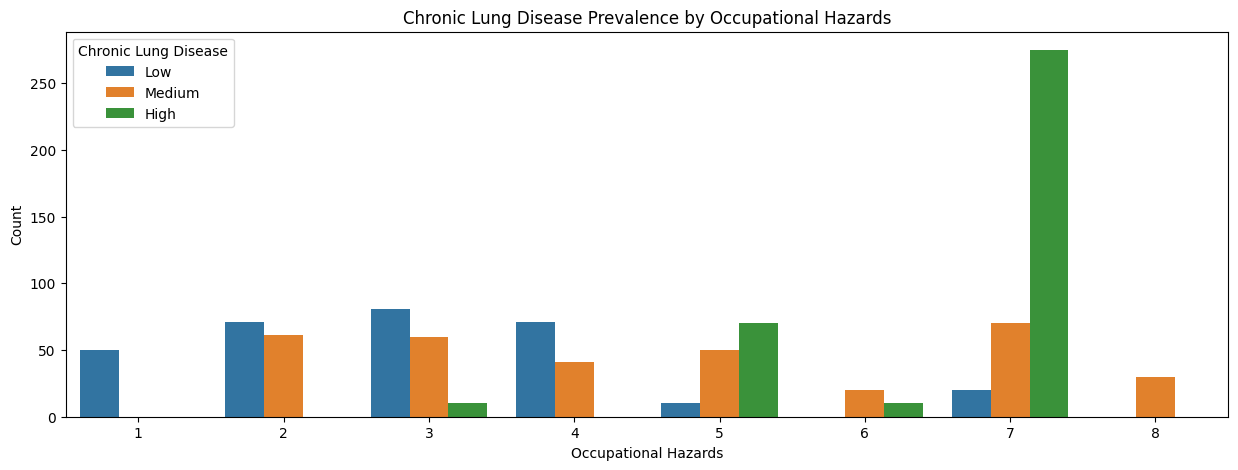

In [8]:
plt.figure(figsize=(15, 9))
sns.boxplot(data=df,x='chronic Lung Disease',y='Age',hue='Level')
plt.title('Age Distribution by Chronic Lung Disease')
plt.xlabel('Chronic Lung Disease Level')
plt.ylabel('Age')
plt.show()
plt.figure(figsize=(15, 5))
sns.countplot(data=df,x='OccuPational Hazards',hue='Level')
plt.title('Chronic Lung Disease Prevalence by Occupational Hazards')
plt.xlabel('Occupational Hazards')
plt.ylabel('Count')
plt.legend(title='Chronic Lung Disease')
plt.show()

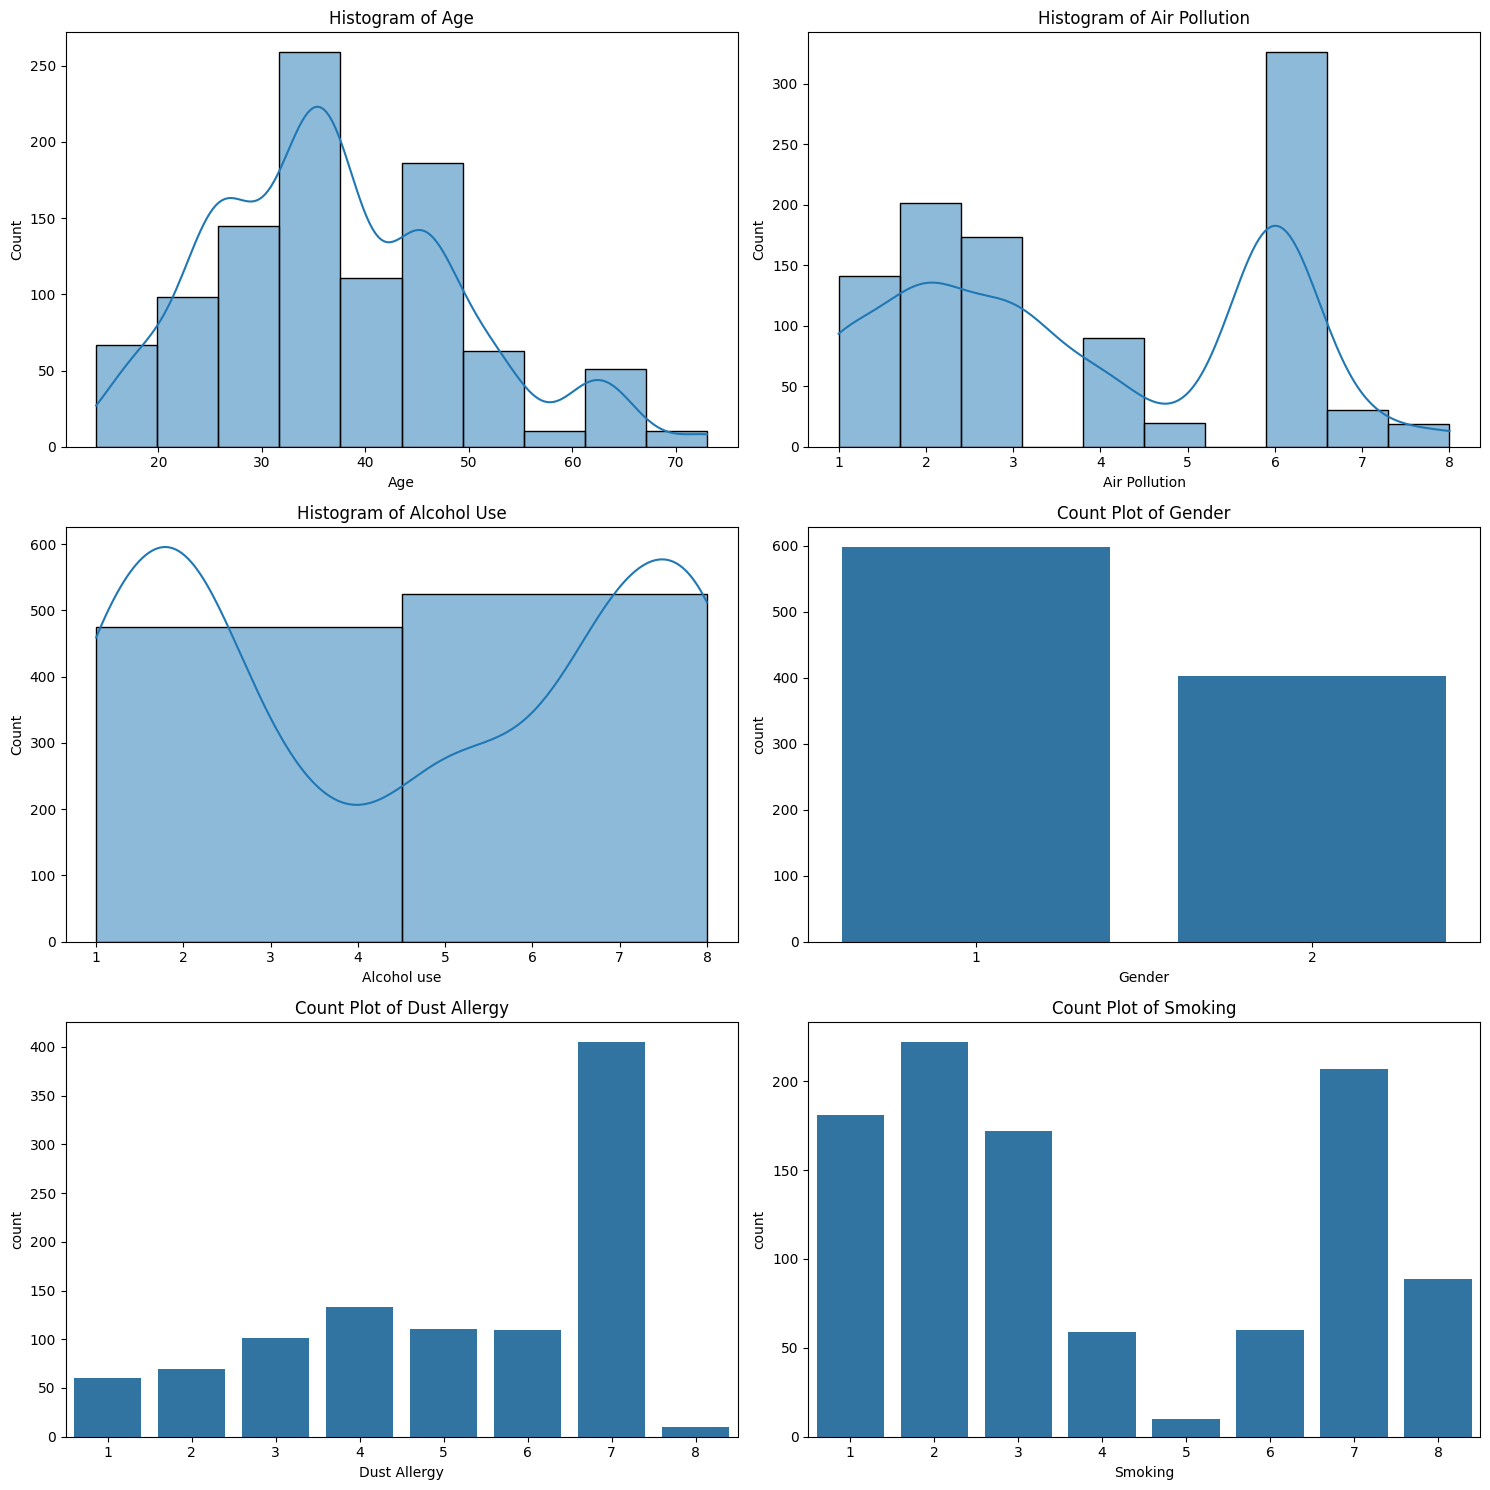

In [9]:
fig,axes=plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
sns.histplot(df['Age'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Age')
sns.histplot(df['Air Pollution'], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Air Pollution')
sns.histplot(df['Alcohol use'], bins=2, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Alcohol Use')
sns.countplot(x='Gender', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Count Plot of Gender')
sns.countplot(x='Dust Allergy', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Count Plot of Dust Allergy')
sns.countplot(x='Smoking', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Count Plot of Smoking')
plt.tight_layout()
plt.show()

****
## Data Preprocessing ##
****

In [10]:
# Dropping Unwanted columns
col=['index','Patient Id']
df.drop(columns=col,inplace=True,axis=1)

In [11]:
#Encoding target column
df['Level']=df['Level'].apply(lambda x: 0 if x=='Low' else 1 if x=='Medium' else 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

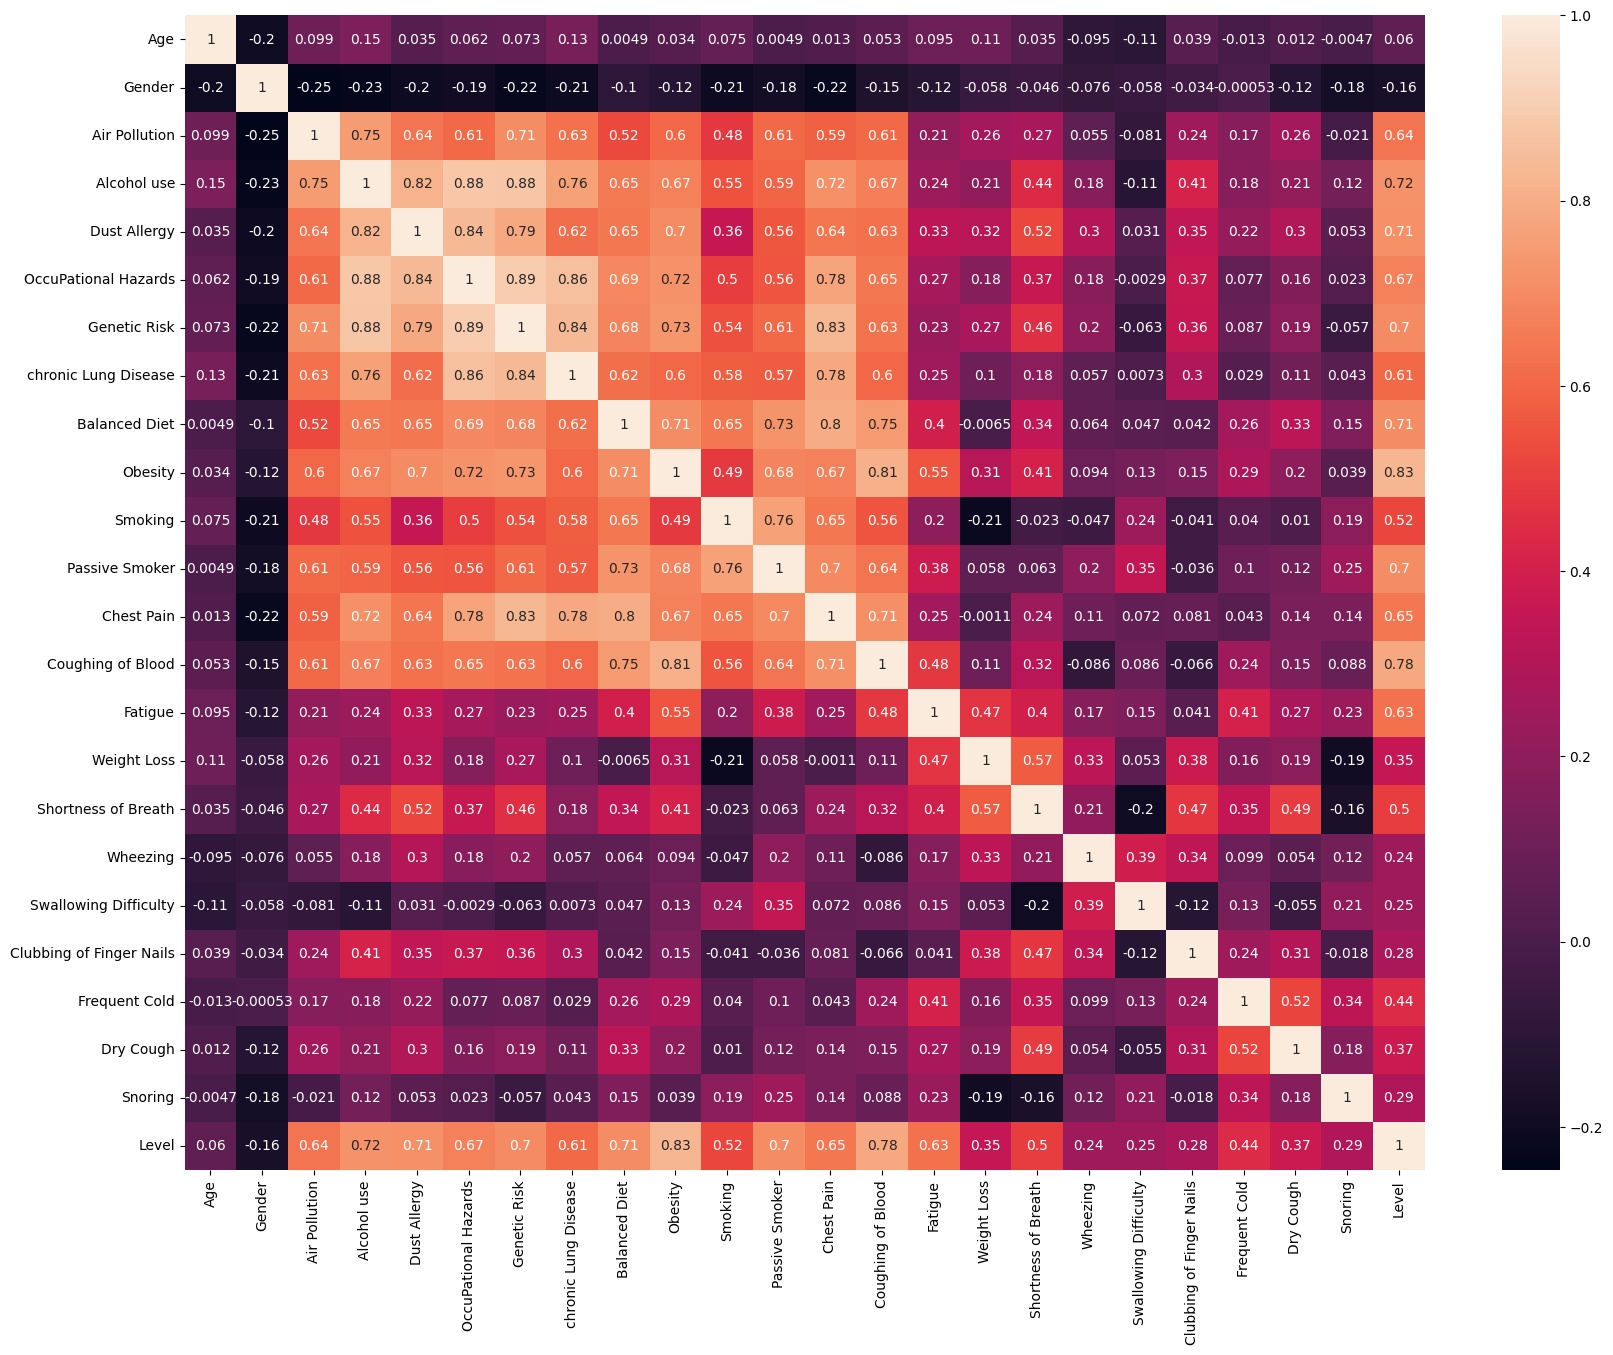

In [13]:
# Finding correlation between features
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cbar='magma')
plt.show()

In [14]:
# Splitting the Target column from the original dataset
x=df.drop(columns='Level')
y=df['Level']

# Calculating Mutual Information for capturing both linear and non-linear relationship
from sklearn.feature_selection import mutual_info_classif
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
print(mi_df)

                     Feature  Mutual Information
0             Passive Smoker            0.621747
1          Coughing of Blood            0.585190
2                Alcohol use            0.542540
3                    Obesity            0.541979
4                 Chest Pain            0.538758
5                   Wheezing            0.512586
6              Balanced Diet            0.472056
7               Dust Allergy            0.441617
8        Shortness of Breath            0.428435
9       OccuPational Hazards            0.417543
10                   Smoking            0.408536
11             Air Pollution            0.388124
12      chronic Lung Disease            0.379640
13              Genetic Risk            0.379164
14                       Age            0.374519
15                   Fatigue            0.354335
16  Clubbing of Finger Nails            0.273501
17                 Dry Cough            0.260228
18             Frequent Cold            0.239326
19               Wei

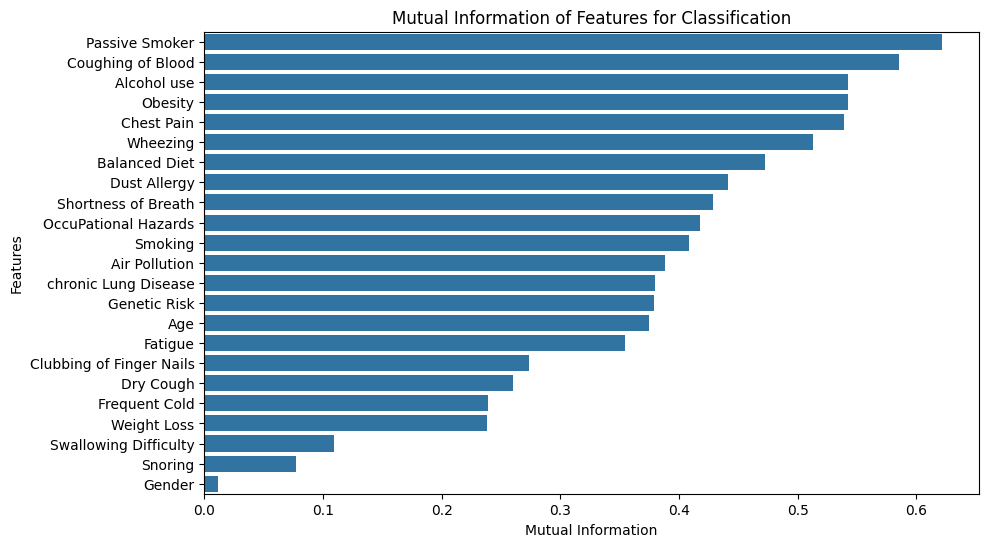

In [15]:
#Plotting Mutual Information for better understanding
plt.figure(figsize=(10,6))
sns.barplot(x='Mutual Information',y='Feature', data=mi_df)
plt.title('Mutual Information of Features for Classification')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.show()

In [20]:
# Splitting the data into Training (75%) and Testing (25%)
from sklearn.model_selection import train_test_split
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)

****
## Models ##
****

## [Decision Tree]

In [21]:
#Fit Train Data
model1 = DecisionTreeClassifier(max_depth=25)
model1.fit(x_t, y_t)

DecisionTreeClassifier(max_depth=25)

In [29]:
#Train accuracy
Y_prd1_train = model1.predict(x_t)
print("Train accuracy:",accuracy_score(y_t,Y_prd1_train)*100)

Train accuracy: 100.0


In [30]:
#Test accuracy and classification report
Y_prd1 = model1.predict(x_te)
print(classification_report(y_te,Y_prd1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        89

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



## [KNN Classifier]

In [31]:
#Fit Train Data
model2 = KNeighborsClassifier()
model2.fit(x_t, y_t)

KNeighborsClassifier()

In [33]:
#Train accuracy
Y_prd2_train = model2.predict(x_t)
print("Train accuracy:",accuracy_score(y_t,Y_prd2_train)*100)

Train accuracy: 99.73333333333333


In [34]:
#Test accuracy and classification report
Y_prd2 = model2.predict(x_te)
print(classification_report(y_te,Y_prd2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        89

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



## [RandomForest]

In [35]:
#Fit Train Data
model3 = RandomForestClassifier()
model3.fit(x_t, y_t)

RandomForestClassifier()

In [36]:
#Train accuracy
Y_prd3_train = model3.predict(x_t)
print("Train accuracy:",accuracy_score(y_t,Y_prd3_train)*100)

Train accuracy: 100.0


In [38]:
#Test accuracy and classification report
Y_prd3 = model3.predict(x_te)
print(classification_report(y_te,Y_prd3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        89

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

